<a href="https://colab.research.google.com/github/Israel-Garcilazo/EDP1/blob/main/EDP2_M%C3%ADnimos_Cuadrados_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de mínimos cuadrados.

Se va a resolver:  $$u''+u=x$$ con condiciones $$u(0)=0,\; u'(0)=2$$ mediante el método de los mínimos cuadrados, que consiste en:

$mín \int_0^1 (u_N''+u_N - x)^2\,dx$

In [12]:
# inicializamos las librerías a utilizar.
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.var('x');

In [2]:
# Proponemos una función de aproximación de la forma u_N = a0 + a1 x + a2 x^2 + a3 x^3
a0,a1,a2,a3 = sp.symbols('a0 a1 a2 a3')
uN = a0 + a1*x + a2*x**2 + a3*x**3
uN_p = sp.diff(uN, x)
uN_pp = sp.diff(uN_p, x)

# Aplicamos condiciones iniciales u(0)=0, u'(0)=2
sol_init = sp.solve([sp.Eq(uN.subs(x,0),0), sp.Eq(uN_p.subs(x,0),2)], [a0,a1])
sol_init

{a0: 0, a1: 2}

In [3]:
# Sustituimos las constantes provenientes de las condiciones iniciales
uN_r = sp.simplify(uN.subs(sol_init))
uN_pp_r = sp.simplify(uN_pp.subs(sol_init))
uN_r, uN_pp_r

(x*(a2*x + a3*x**2 + 2), 2*a2 + 6*a3*x)

In [13]:
# calculamos u_N'' + u_N - x
eps = sp.simplify(uN_pp_r + uN_r - x)

# Calculamos la integral de las diferencias cuadradas.
E = sp.integrate(sp.simplify(eps**2), (x, 0, 1))

# Derivamos J respecto a a2 y a3
eqs = [sp.Eq(sp.diff(E, a2), 0), sp.Eq(sp.diff(E, a3), 0)]
eqs, sp.simplify(E)

([Eq(166*a2/15 + 49*a3/3 + 5/2, 0), Eq(49*a2/3 + 1018*a3/35 + 22/5, 0)],
 83*a2**2/15 + 49*a2*a3/3 + 5*a2/2 + 509*a3**2/35 + 22*a3/5 + 1/3)

In [5]:
# Resolvemos el sistema para a2, a3 de forma directa.
sol_coeffs = sp.solve(eqs, [a2,a3])
sol_coeffs

{a2: -1335/86789, a3: -24759/173578}

In [6]:
# Sustituimos los valores aproximados en la solución y queda como:
u_approx = sp.simplify(uN_r.subs(sol_coeffs))
u_approx

x*(-24759*x**2 - 2670*x + 347156)/173578

In [7]:
# Calculamos la solución exacta de forma directa mediante simpy.
u = sp.Function('u')
ode = sp.Eq(sp.diff(u(x), x, 2) + u(x), x)
u_exact = sp.dsolve(ode, ics={u(0):0, sp.diff(u(x),x).subs(x,0):2})
u_exact

Eq(u(x), x + sin(x))

In [8]:
# Planteamos las funciones numéricas para graficar y calcular error
uA = sp.lambdify(x, u_approx, 'numpy')
uE = sp.lambdify(x, u_exact.rhs, 'numpy')

xs = np.linspace(0,1,300)
err = np.abs(uE(xs) - uA(xs))
float(np.max(err))

0.001101017233081647

Error máximo |u_exact - u_approx| en [0,1]: 0.00110102


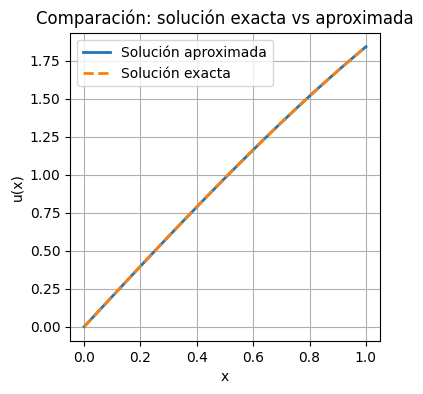

In [11]:
# Mostramos el resultado del error máximo y la grafica comparativa.
max_err = np.max(err)
print(f"Error máximo |u_exact - u_approx| en [0,1]: {max_err:.8f}")

plt.figure(figsize=(4,4))
plt.plot(xs, uA(xs), '-', linewidth=2, label='Solución aproximada')
plt.plot(xs, uE(xs), '--', linewidth=2, label='Solución exacta')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Comparación: solución exacta vs aproximada')
plt.legend()
plt.grid(True)
plt.show()